# Statistical Inference

So far, we have seen methods for describing a sample of data (descriptive statistics) and we have reasoned on abstract concepts using basic probability theory concepts. In practice, we are often interested in the properties of a **population**, rather than a sample or some abstract quantities. Examples are:
* What is the percentage of votes each candidate will get at an election?
* What is the proportion of defective goods in a manufacturing process?
* Is there a relationship between smoking and developing a given disease in the world population?

One approach to answer these questions would be to collect the whole population, but this is often unfeasible (e.g., interviewing **all voters**) and sometimes impossible.

The statistician's approach is instead to **sample** a subset of the whole population and try to **infer some of the properties of the population from the sample**. This part of statistics is called **statistical inference**. Analyzing data using such techniques is often called an **inferential analysis**. In this part of the course, we will review different statistical tools for inferential analysis and show some concrete examples, without giving a formal definition of such tools, which is left to other courses.

## Sampling
The first step towards an inferential analysis is the **sampling process**. When we acquire a pre-made dataset, sampling is already done, while when we collect data, we are actually sampling from the population. In both cases, it is important to reason on the properties of the sample we will work on.

### Simple random sample
The easiest way to sample from a population is **randomly**. A simple random sample makes two assumptions:
* **Unbiasedness**: each element of the population has the same probability of being selected;
* **Independence**: selecting one of the elements of the population does not affect the selection of the other elements in any way.

This approach guarantees that, if we collect a large number of elements, the obtained sample will be a good representative of the population. For instance, if in the population of interest we have $10\%$ of people over $70$, we expect this proportion to be roughly represented in the sample as well.

An example of bad sampling:

> We want to ask the inhabitants of a city whether they are satisfied with the quality of life in that city. To sample a large quantity of subjects, we go to the main square and ask passengers to reply to a few questions. If a ground of friends stops we interview all of them to maximize the number of examples we can obtain.

The sampling design outlined above has two important issues:
* **Unbiasedness**: the selection process is biased (**selection bias**). We selected a single location in the city (the main square) and hence we are **oversampling** people who tend to spend time there (e.g., because they work in the city center), versus people who do not spend much time there (e.g., because they work in the periphery).
* **Independence**: when we interview groups of people, in fact, we are breaking the independence assumption, Indeed, selecting one of the people is not independent of selecting others (the members of the same group).

Another example of flawed sampling:

> We want to check how many people believe a given conspiracy theory. To do so, I send a message to all my contacts ($500$). About $200$ of them reply to my message and $180$ of them say they do believe that theory. $80\%$ of people actually believe it!

Also here there are important issues:
* **Selection bias**: I am not randomly sampling. Instead, I am choosing among my contacts.
* **Response bias**: Only $200$ people replied. Chances are that only people who are very motivated will reply. Maybe most of the believers did, while the others just ignored my message.

Another example:

> We interview people on their voting preferences by dialing random phone numbers.

While this may seem sound, we will not end up with a simple random sample because we will not select people without a phone number and we will oversample people with more than one numbers (e.g., work and home).

The plot below shows the importance of sample size:

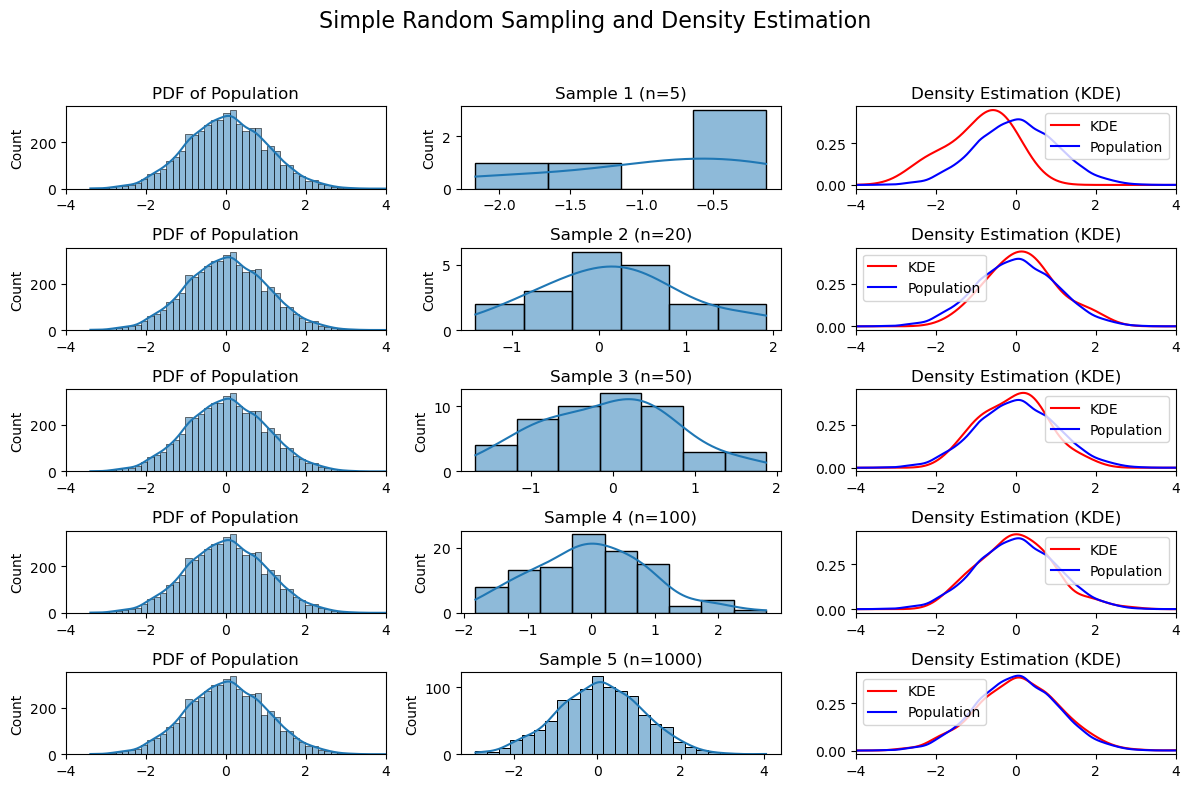

In [7]:
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
from scipy.stats import norm, gaussian_kde

# Set a random seed for reproducibility
random.seed(45)

# Define the population
population = np.random.normal(loc=0, scale=1, size=5000)  # Example population (normal distribution)
kde_pop = gaussian_kde(population)

# Sample size and number of samples
sample_sizes = [5,20,50,100,1000]
num_samples = 5

# Create a figure with subplots
fig, axes = plt.subplots(num_samples, 3, figsize=(12, 8))
fig.suptitle("Simple Random Sampling and Density Estimation", fontsize=16)

for i in range(num_samples):
    # Perform simple random sampling
    sample = random.sample(list(population), sample_sizes[i])
    
    # Calculate the PDF of the population
    sns.histplot(population, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title("PDF of Population")
    axes[i, 0].set_xlim([-4,4])
    
    # Plot the sample
    sns.histplot(sample, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Sample {i + 1} (n={sample_sizes[i]})")
    #axes[i, 1].set_xlim([-4,4])
    
    # Estimate density using KDE
    kde = gaussian_kde(sample)
    x = np.linspace(-4, 4, 1000)
    y = kde(x)
    axes[i, 2].plot(x, y, label="KDE", color='r')
    axes[i, 2].set_title("Density Estimation (KDE)")
    axes[i, 2].plot(x, kde_pop(x), label="Population", color='b')
    axes[i, 2].set_xlim([-4,4])
    axes[i, 2].legend()


# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


### Stratified Sampling

Sometimes, the population under study is **heterogeneous**, meaning it contains distinct subgroups with different characteristics. In such cases, **simple random sampling** may fail to capture the diversity of the population, leading to **under-representation** of certain groups.

For example, suppose we hypothesize that the variable `Occupation` influences voting preferences. If we randomly sample from the entire population, we might unintentionally select too few individuals from certain occupations, skewing our results.

To address this, we can use **stratified sampling**. This involves:

- Dividing the population into **homogeneous subgroups** (*strata*) based on a relevant variable, such as `Occupation`
- Performing **random sampling within each stratum**, ensuring proportional representation

This method improves representativeness but requires **prior knowledge or assumptions** about the population structure.

> **Illustration**  
> The figure below shows:
> - A heterogeneous population  
> - A sample obtained via uniform random sampling  
> - A sample obtained via stratified sampling

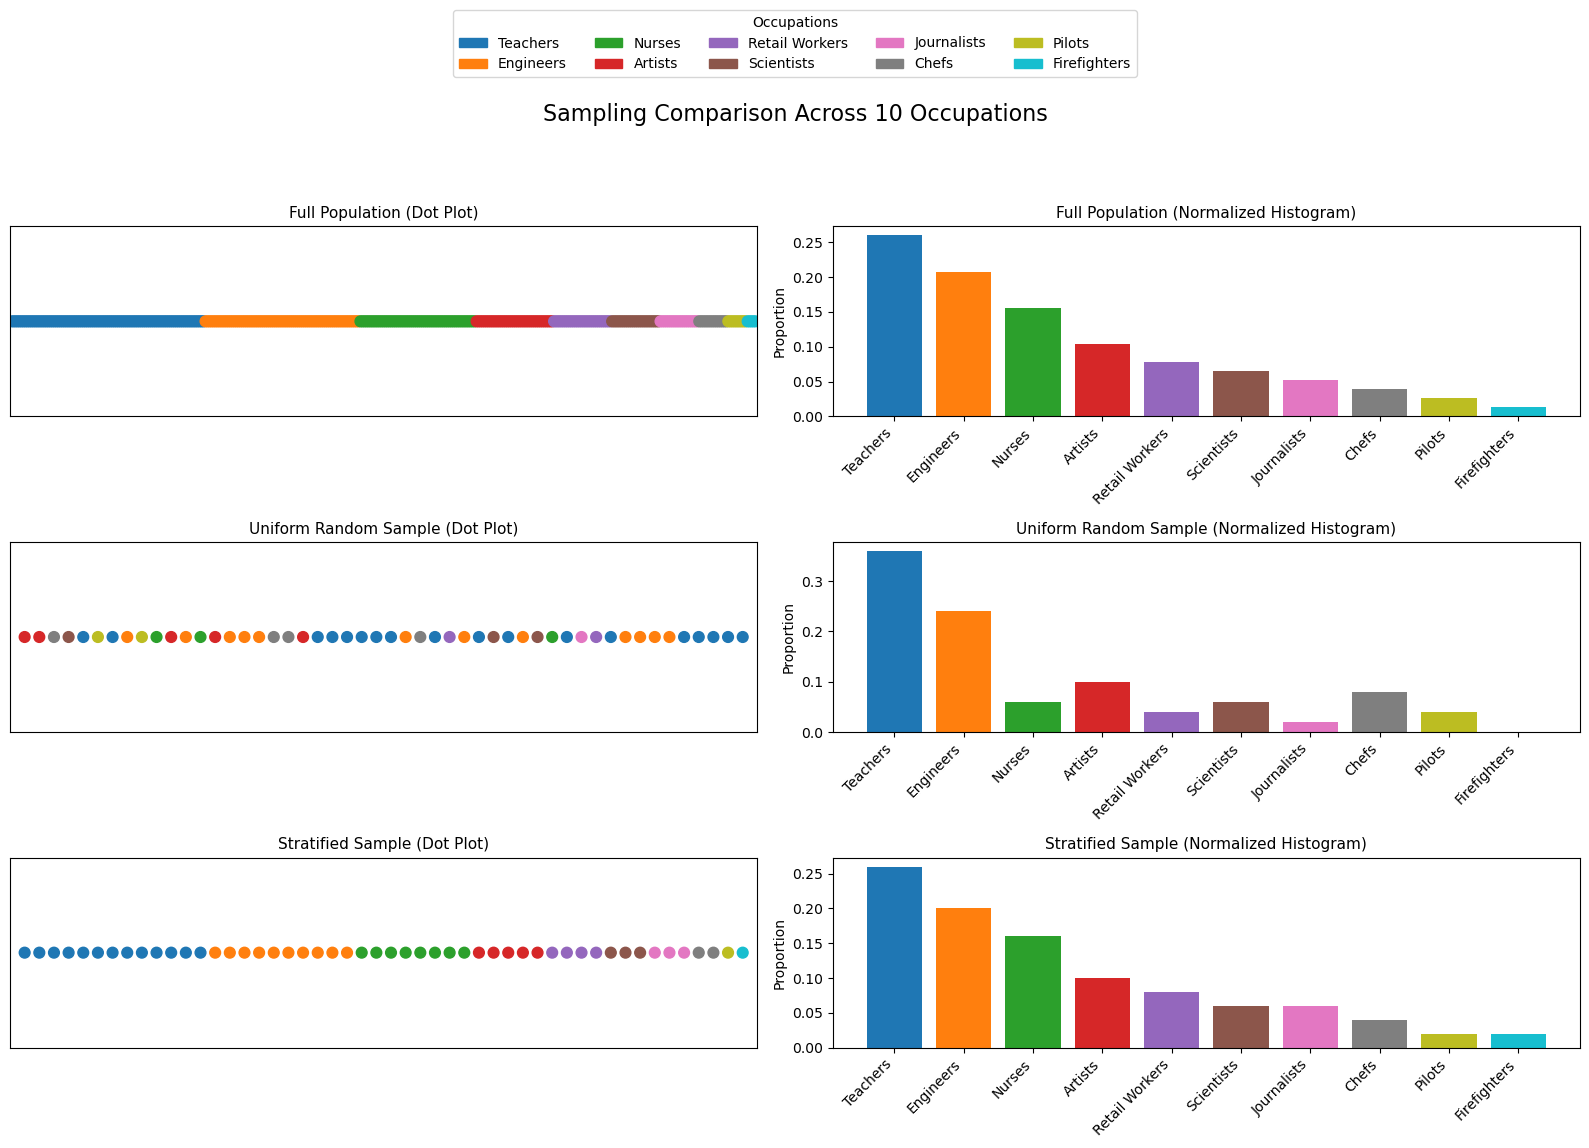

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter

# Define job categories and sizes
categories = {
    'Teachers': 100,
    'Engineers': 80,
    'Nurses': 60,
    'Artists': 40,
    'Retail Workers': 30,
    'Scientists': 25,
    'Journalists': 20,
    'Chefs': 15,
    'Pilots': 10,
    'Firefighters': 5
}
colors = dict(zip(categories.keys(), sns.color_palette("tab10", len(categories))))

# Create full population
population = []
for job, size in categories.items():
    population.extend([job] * size)
population = np.array(population)

# Uniform random sample
np.random.seed(42)
random_sample = np.random.choice(population, size=50, replace=False)

# Stratified sample
stratified_sample = []
total = sum(categories.values())
for job, size in categories.items():
    proportion = size / total
    sample_size = round(proportion * 50)
    indices = np.where(population == job)[0]
    sampled = np.random.choice(indices, size=min(sample_size, len(indices)), replace=False)
    stratified_sample.extend(population[sampled])
stratified_sample = np.array(stratified_sample)

# Plotting functions
def plot_dots(ax, data, title):
    x = np.arange(len(data))
    y = np.zeros_like(x)
    color_list = [colors[job] for job in data]
    ax.scatter(x, y, c=color_list, s=60)
    ax.set_title(title, fontsize=11)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim(-1, len(data))

def plot_histogram(ax, data, title):
    counts = Counter(data)
    total = sum(counts.values())
    proportions = [counts.get(job, 0) / total for job in categories.keys()]
    ax.bar(range(len(categories)), proportions, color=[colors[job] for job in categories.keys()])
    ax.set_title(title, fontsize=11)
    ax.set_ylabel("Proportion")
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(list(categories.keys()), rotation=45, ha='right')

# Create figure
fig, axes = plt.subplots(3, 2, figsize=(16, 10))
fig.suptitle("Sampling Comparison Across 10 Occupations", fontsize=16, y=1.05)

# Add legend outside the plot at the top
legend_patches = [mpatches.Patch(color=color, label=job) for job, color in colors.items()]
fig.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fontsize=10, title="Occupations")

# Row 1: Full population
plot_dots(axes[0, 0], population, "Full Population (Dot Plot)")
plot_histogram(axes[0, 1], population, "Full Population (Normalized Histogram)")

# Row 2: Uniform random sample
plot_dots(axes[1, 0], random_sample, "Uniform Random Sample (Dot Plot)")
plot_histogram(axes[1, 1], random_sample, "Uniform Random Sample (Normalized Histogram)")

# Row 3: Stratified sample
plot_dots(axes[2, 0], stratified_sample, "Stratified Sample (Dot Plot)")
plot_histogram(axes[2, 1], stratified_sample, "Stratified Sample (Normalized Histogram)")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

### Sampling in Python

In Python we can easily sample from known distributions using numpy `random` module, as shown in the example below:

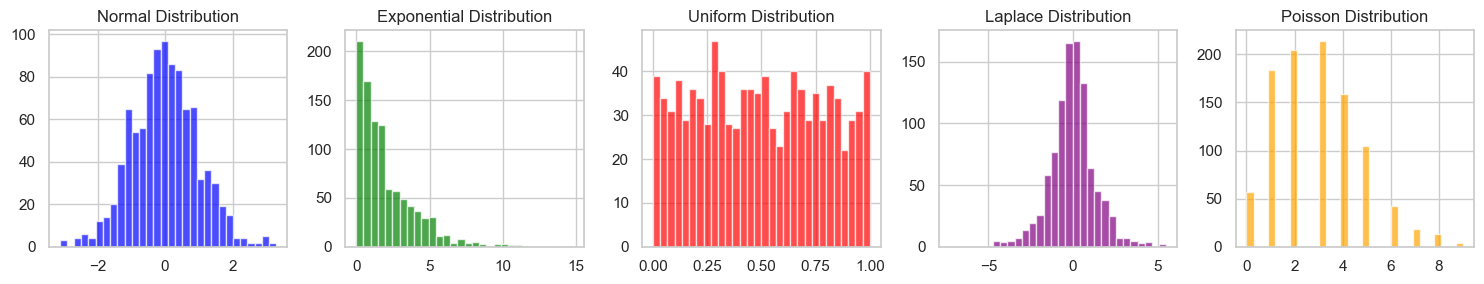

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Set the sample size
sample_size = 1000

# Sample from the Normal (Gaussian) Distribution
mean_normal = 0
std_dev_normal = 1
samples_normal = np.random.normal(mean_normal, std_dev_normal, sample_size)

# Sample from the Exponential Distribution
rate_exponential = 0.5
samples_exponential = np.random.exponential(1/rate_exponential, sample_size)

# Sample from the Uniform Distribution
low_uniform = 0
high_uniform = 1
samples_uniform = np.random.uniform(low_uniform, high_uniform, sample_size)

# Sample from the Laplace Distribution
loc_laplace = 0
scale_laplace = 1
samples_laplace = np.random.laplace(loc_laplace, scale_laplace, sample_size)

# Sample from the Poisson Distribution
lam_poisson = 3
samples_poisson = np.random.poisson(lam_poisson, sample_size)

# Create histograms to visualize the distributions
plt.figure(figsize=(15, 3))

plt.subplot(1, 5, 1)
plt.hist(samples_normal, bins=30, color='blue', alpha=0.7)
plt.title('Normal Distribution')

plt.subplot(1, 5, 2)
plt.hist(samples_exponential, bins=30, color='green', alpha=0.7)
plt.title('Exponential Distribution')

plt.subplot(1, 5, 3)
plt.hist(samples_uniform, bins=30, color='red', alpha=0.7)
plt.title('Uniform Distribution')

plt.subplot(1, 5, 4)
plt.hist(samples_laplace, bins=30, color='purple', alpha=0.7)
plt.title('Laplace Distribution')

plt.subplot(1, 5, 5)
plt.hist(samples_poisson, bins=30, color='orange', alpha=0.7)
plt.title('Poisson Distribution')

plt.tight_layout()
plt.show()


We can also sample from an existing sample to obtain a **subsample**. This can be done starting from a dataset. For instance, let us consider the *weight-height* dataset:

In [79]:
import pandas as pd
data=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   object 
 1   BMI     4231 non-null   float64
 2   height  4231 non-null   float64
 3   weight  4231 non-null   float64
dtypes: float64(3), object(1)
memory usage: 132.3+ KB


,sex,BMI,height,weight
0,M,33.36,187.96,117.933920
1,M,26.54,177.80,83.914520
2,F,32.13,154.94,77.110640
3,M,26.62,172.72,79.378600
4,F,27.13,167.64,76.203456


We can obtain a subsample of 1000 observations as follows:

In [80]:
sample1=data.sample(1000)
sample1.info()
sample1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750 to 1441
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     1000 non-null   object 
 1   BMI     1000 non-null   float64
 2   height  1000 non-null   float64
 3   weight  1000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 39.1+ KB


,sex,BMI,height,weight
750,M,19.25,182.88,64.410064
3672,M,33.94,175.26,104.326160
1185,F,23.03,170.18,66.678024
160,M,30.85,175.26,94.800728
3794,M,26.88,175.26,82.553744


Sampling will be random and uniform. As can be seen the indexes of the rows are shuffled. By default, Pandas will sample without replacement. We can sample with replacement specifying `replace=True`. For instance, we can obtain a larger sample (with repetitions) as follows:

In [81]:
sample2=data.sample(5000, replace=True)
sample2.info()
sample2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1928 to 475
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     5000 non-null   object 
 1   BMI     5000 non-null   float64
 2   height  5000 non-null   float64
 3   weight  5000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 195.3+ KB


,sex,BMI,height,weight
1928,M,22.97,177.80,72.574720
1231,M,27.45,167.64,77.110640
790,F,23.78,157.48,58.966960
3502,M,26.92,172.72,80.285784
3826,F,22.80,172.72,68.038800


We can perform stratified sampling as follows:

In [88]:
# Define the stratification variable
strata_variable = 'sex'

# Number of samples per stratum
samples_per_stratum = 500

# Perform stratified sampling with include_groups=False
stratified_sample = (
    data.groupby(strata_variable, group_keys=False)
        .apply(lambda x: x.sample(samples_per_stratum), include_groups=True)
        .reset_index(drop=True)
)

# Inspect the result
stratified_sample.info()
stratified_sample.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     1000 non-null   object 
 1   BMI     1000 non-null   float64
 2   height  1000 non-null   float64
 3   weight  1000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_62824/1972380443.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(samples_per_stratum), include_groups=True)


,sex,BMI,height,weight
0,F,19.05,167.64,53.523856
1,F,23.78,157.48,58.966960
2,F,30.03,162.56,79.378600
3,F,26.63,165.10,72.574720
4,F,20.58,162.56,54.431040


Note that, with this method, sampled observations will be sorted by `sex`. To get rid of this bias, we can shuffle the dataframe as follows:

In [89]:
stratified_sample = stratified_sample.iloc[np.random.choice(len(stratified_sample), len(stratified_sample), replace=False)]
stratified_sample.head()

,sex,BMI,height,weight
122,F,19.37,167.64,54.431040
432,F,18.82,165.10,51.255896
890,M,31.31,170.18,90.718400
476,F,29.16,162.56,77.110640
182,F,19.84,160.02,50.802304


Males and females will be perfectly balanced by design in this stratified sample:

In [90]:
stratified_sample['sex'].value_counts()

sex
F    500
M    500
Name: count, dtype: int64

## Sampling Distribution of the Mean

Let’s consider this problem:

> A bakery sells packages of cookies labeled as weighing **1kg**. Due to small variations in the production process, the actual weight of each package may differ slightly. To ensure quality, the bakery wants to verify that the average weight is close to the target.

We take a **random sample of $n = 1000$** packages and measure their weights $x_1, x_2, \ldots, x_n$. We compute the sample mean:

$$
\overline{x} = \frac{x_1 + x_2 + \ldots + x_n}{n} = 1000.2 \text{g}
$$

This value is close to the target of 1000g, so we might conclude that the production process is accurate. But what if we took another sample? Would we get the same result?

$$
\overline{x} = \frac{x_1 + x_2 + \ldots + x_n}{n} = 999.7 \text{g}
$$

This is still close to the target, but slightly lower than before. If we repeated this process many times, we would get a **distribution of sample means**.

We treat each package’s weight as a **random variable** $X_i$, with:

$$
E[X_i] = \mu \\
Var[X_i] = \sigma^2
$$

where $\mu$ and $\sigma$ are the **true mean and standard deviation** of the population.

The sample mean $\overline{X}$ is also a random variable:

$$
\overline{X} = \frac{X_1 + X_2 + \ldots + X_n}{n}
$$

Note that, while we cannot make assumptions for the individual $X_i$, for the **central limit theorem**, we know that:

> For large $n$, the distribution of $\overline{X}$ will be approximately **normal**, regardless of the shape of the original data.

We can derive the expected value, variance and standard deviation of $X$ as follows:

$$
E[\overline{X}] = E\left[\frac{1}{n} \sum_{i=1}^n X_i\right] = \frac{1}{n} \sum_{i=1}^n E[X_i] = \mu
$$

$$
Var[\overline{X}] = Var\left[\frac{1}{n} \sum_{i=1}^n X_i\right] = \frac{1}{n^2} \sum_{i=1}^n Var[X_i] = \frac{\sigma^2}{n}
$$

$$
Std[\overline{X}] = \frac{\sigma}{\sqrt{n}}
$$

We note that:
- The **expected value of the sample means** (the mean of the means) converges to the **mean of the population**. This is the value we want to estimate: the actual average weight of packages.
- The **standard deviation of the distribution** quantifies the precision according to which we can measure the mean. A small standard deviation indicates that sample means have small variability, so a single estimate will likely be closer to the true mean and hence more reliable.

This is exemplified by the following figure:

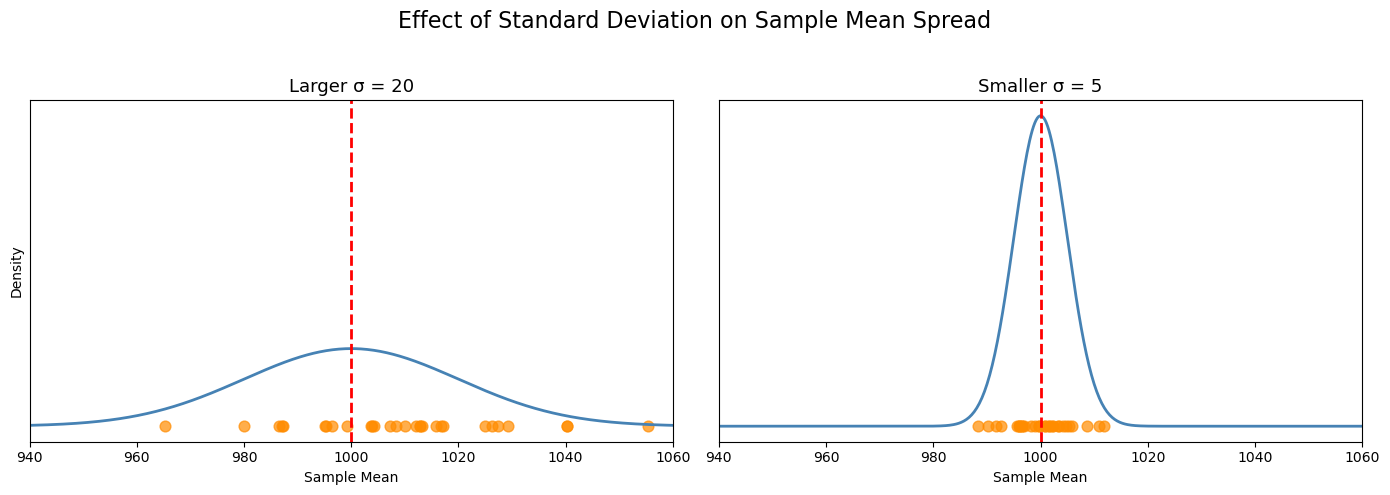

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 1000
sigmas = [20, 5]
n_points = 30
x = np.linspace(mu - 60, mu + 60, 500)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
fig.suptitle("Effect of Standard Deviation on Sample Mean Spread", fontsize=16)

for ax, sigma, label in zip(axes, sigmas, ["Larger σ = 20", "Smaller σ = 5"]):
    # Plot Gaussian curve
    y = norm.pdf(x, mu, sigma)
    ax.plot(x, y, color='steelblue', lw=2)
    
    # Sample means
    sample_means = np.random.normal(mu, sigma, n_points)
    ax.scatter(sample_means, np.zeros_like(sample_means), color='darkorange', s=60, alpha=0.7)
    
    # Mean line
    ax.axvline(mu, color='red', linestyle='--', lw=2)
    
    # Labels
    ax.set_title(label, fontsize=13)
    ax.set_xlabel("Sample Mean")
    ax.set_xlim(mu - 60, mu + 60)
    ax.set_yticks([])

axes[0].set_ylabel("Density")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Standard Error

While useful to quantify our precision in the estimation of the true mean, the standard deviation depends on the variance of the population, which is unknown.

In practice, we estimate it using the sample standard deviation:

$$
s_{n-1} = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2}
$$

and define the Standard Error (SE) as follows:

$$
SE(\overline{x}) = \frac{s_{n-1}}{\sqrt{n}}
$$

Similar to the standard deviation, **the standard error quantifies our uncertainty in the estimation of the true mean**.

Note that the standard error is **inversely proportional to the square root of the sample size**:

$$
SE(\overline{x}) \propto \frac{1}{\sqrt{n}}
$$

This relationship is common in many statistical estimators. It means that:

- If we **double the sample size**, the error **reduces by about 30%**.
- To **halve the error**, we need to **quadruple the sample size**.

This is a key insight: reducing uncertainty requires much more data than we might expect.

The standard error tells us how close our sample mean $\overline{x}$ is likely to be to the true mean $\mu$. A small standard error means that repeated samples will yield similar results, and our estimate is precise. A large standard error means more variability and less confidence in the estimate.

This is shown in the graph below:

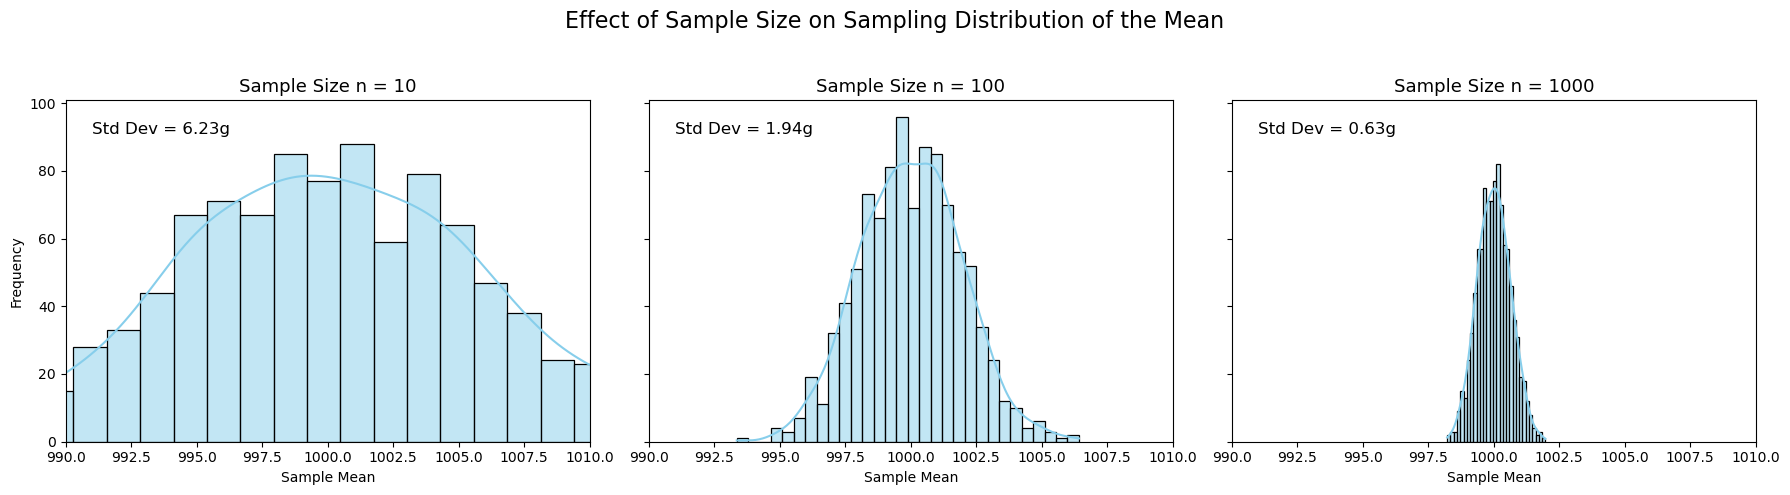

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
mu = 1000
sigma = 20
sample_sizes = [10, 100, 1000]
n_simulations = 1000

# Prepare figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle("Effect of Sample Size on Sampling Distribution of the Mean", fontsize=16)

# Generate and plot
for i, n in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.normal(mu, sigma, n)) for _ in range(n_simulations)]
    std_dev = np.std(sample_means)
    
    sns.histplot(sample_means, bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Sample Size n = {n}", fontsize=13)
    axes[i].set_xlabel("Sample Mean")
    axes[i].set_xlim(990, 1010)
    axes[i].annotate(f"Std Dev = {std_dev:.2f}g", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

axes[0].set_ylabel("Frequency")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

This figure illustrates how **sample size affects the precision of the sample mean**. Each panel shows the distribution of sample means obtained by repeatedly sampling from the same population (mean = 1000g, standard deviation = 20g), but with different sample sizes:

- **Left (n = 10)**: The distribution is wide, indicating high variability. Small samples lead to more fluctuation in the estimated mean.
- **Center (n = 100)**: The distribution narrows, showing improved stability. The sample means are more tightly clustered around the true mean.
- **Right (n = 1000)**: The distribution is very narrow. Large samples yield highly consistent estimates, with minimal deviation from the true mean.

This visual reinforces the key idea that **larger samples reduce the standard error**, making our estimates more reliable. The spread of the sampling distribution shrinks proportionally to $1/\sqrt{n}$.

### t-Student Distribution
When $n$ is small, the distribution of $\overline{X}$ is **not exactly normal**. Instead, we use the **t-Student distribution**, which accounts for extra uncertainty:

$$
t_{n-1} = \frac{\overline{X} - \mu}{s_{n-1} / \sqrt{n}}
$$

This follows a t-distribution with $n - 1$ degrees of freedom. The t-distribution looks like a Gaussian but has **heavier tails**, meaning more room for extreme values. As $n$ increases, the t-distribution **converges to the normal distribution**.

> Note that the t-Student distribution is obtained by applying standardization using the standard error rather than the standard deviation (which is unknown).

The relationship between a t-Student and Gaussian distribution is shown in the figure below:

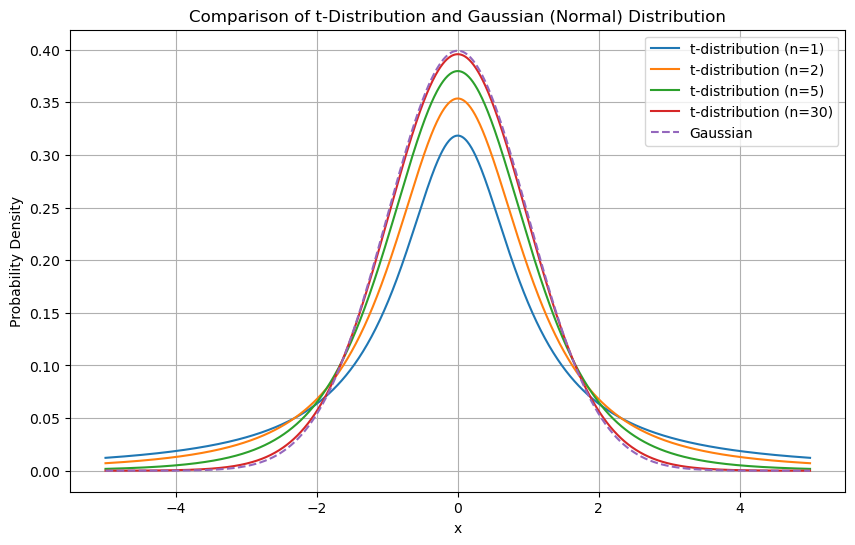

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Define a range of degrees of freedom (df) values
df_values = [1, 2, 5, 30]

# Create a range of x values for the PDF
x = np.linspace(-5, 5, 1000)

# Create a figure to hold the plot
plt.figure(figsize=(10, 6))

# Iterate through each degrees of freedom value and create plots for t-distribution and Gaussian
for df in df_values:
    # Calculate the PDF values for the t-distribution with the current df
    pdf_t = t.pdf(x, df)
    
    # Calculate the PDF values for a standard Gaussian (normal) distribution
    pdf_normal = norm.pdf(x)
    
    # Create line plots for the t-distribution and Gaussian with labels
    plt.plot(x, pdf_t, label=f't-distribution (n={df})')

plt.plot(x, pdf_normal, label='Gaussian', linestyle='--')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Comparison of t-Distribution and Gaussian (Normal) Distribution')
plt.legend()

# Show the plot
plt.grid()
plt.show()


As $n$ gets larger, the t-Distribution approximates a Gaussian distribution.

We can now characterize how the means will distribute. In particular, **for large values of $n$, sample means will distribute according to a Gaussian distribution with standard deviation equal to the sample standard deviation**.

## Confidence Intervals

Let’s return to our bakery example. We want to estimate the **true average weight** $\mu$ of cookie packages, which are labeled as 1kg. We take a sample of $n = 1000$ packages and compute:

$$
\overline{x} = 1000.2 \text{g}
$$

This is our estimate of the true mean. However, we know that this value may vary depending on the sample we draw. If we took another sample, we might get a slightly different result. It is interesting to define the **bounds of such variation**, to understand where the true mean $\mu$ is likely to be found relative to our estimate $\overline{x}$.

Remember that the sample mean $\overline{X}$ follows a **Gaussian distribution** centered at $\mu$ due to the **Central Limit Theorem**. 

We also know that about $68.3\%$ of the density of the Gaussian distribution will be within $\mu-\sigma$ and $\overline{x}+\sigma$, so we can write:

$$P\left(\mu-\sigma \leq \overline{x} \leq \mu+\sigma\right) = 0.683$$

Which means that, if we perform several independent samplings, with sample size $n$, the probability of obtaining a defect rate $\overline{x}$ in the range $[\mu-\sigma, \mu+\sigma]$ is $68.3\%$.

It is easy to show that:

$$\overline{x} \in [\mu-\sigma, \mu+\sigma] \Leftrightarrow \mu \in [\overline{x}-\sigma, \overline{x}+\sigma]$$

This is graphically shown in the plot below. The blue segment is the one of bounds $[\mu-\sigma, \mu+\sigma]$. Note that, all times a point $\overline{x}$ happens to be in the blue segment centered around $\mu$, then $\mu$ is in the segment centered around $\overline{x}$.

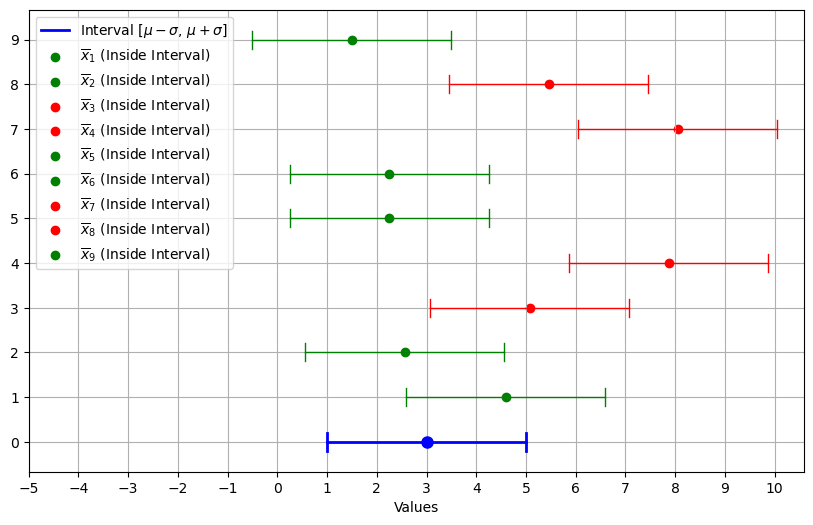

In [17]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

# Parameters
p = 3
sigma = 2
num_samples = 9

# Generate data
x = np.linspace(p - 4 * sigma, p + 4 * sigma, 1000)

# Sample some \hat p values
points = np.random.normal(p, 1.6 * sigma, num_samples)

# Create the plot
plt.figure(figsize=(10, 6))

j = 0

# Plot the point "p" and interval
plt.plot([p - sigma, p + sigma], [j, j], 'b', lw=2, label=f'Interval [$\mu-\sigma$, $\mu+\sigma$]')
plt.plot([p - sigma, p - sigma], [j - 0.2, j + 0.2], 'b', lw=2)
plt.plot([p + sigma, p + sigma], [j - 0.2, j + 0.2], 'b', lw=2)
plt.plot(p, j, 'bo', markersize=8)
j+=1

# Plot the sampled \hat p values and intervals
for i in range(num_samples):
    c = 'r'
    if points[i] <= p+sigma and points[i] >= p-sigma:
        c = 'g'
    plt.plot([points[i] - sigma, points[i] + sigma], [j, j], c, lw=1)
    plt.plot([points[i] - sigma, points[i] - sigma], [j - 0.2, j + 0.2], c, lw=1)
    plt.plot([points[i] + sigma, points[i] + sigma], [j - 0.2, j + 0.2], c, lw=1)
    plt.scatter(points[i], j, marker='o', color=c, label='$\overline{x}_'+f'{i + 1}'+'$ (Inside Interval)')
    j+=1
    
# Set labels and title
plt.xlabel('Values')
#plt.yticks([1] + [3 + i for i in range(num_samples)] + [5 + num_samples], ['p'] + [f'𝜂𝑝{i + 1}' for i in range(num_samples)] + [''])
plt.yticks(np.arange(num_samples+1))
plt.xticks(np.arange(np.min(x),np.max(x)))
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


This allows us to write:

$$P\left(\overline{x}-\sigma \leq \mu \leq \hat p+\sigma\right) = 0.683$$

which has a powerful interpretation:

> If we draw many independent samples of size $n$ and compute $\overline{x}$ from the samples, the true mean $\mu$ will lie in the interval $[\overline{x}-\sigma, \overline{x}+\sigma]$ $68.3\%$ of the times

Alternatively

> We can say with a confidence of $68.3\%$ that the true mean will be in the $[\overline{x}-\sigma, \overline{x}+\sigma]$ interval.

In this context, $[\overline{x}-\sigma, \overline{x}+\sigma]$ is called a **confidence interval**.

We still have to compute actual numbers for our confidence interval, but we don't have the standard deviation $\sigma$. In practice, we replace it with the standard error and obtain the confidence interval:

$$[\overline{x}-SE(\overline{x}), \overline{x}+SE(\overline{x})]$$

We note that $68.3$ is a very peculiar number and also a relatively low probability. In general, given a chosen percentage $p$, that we call a **confidence level**, we can obtain a number $\beta$ such that:

$$P\left(\overline{x}-\beta \sigma \leq \mu \leq \hat p+\beta \sigma\right) = p$$

leading to the following confidence interval:

$$[\overline{x}-\beta SE(\overline{x}), \overline{x}+\beta SE(\overline{x})]$$

Alternatively, we will say that we chose a **significance level** $\alpha=0.05$, which quantifies the number of times we admin the true mean will be out of the confidence interval.

It is very common to set $\alpha=0.05$, which leads to $\beta=1.96$ and the following confidence interval:

$$[\overline{x}-1.96 \cdot SE(\overline{x}), \overline{x}+1.96 \cdot SE(\overline{x})]$$

### Example: Confidence Interval for Cookie Weights

Let’s suppose we want to estimate the **true average weight** $\mu$ of cookie packages sold by a bakery. We take a sample of $n = 1000$ packages and compute the sample mean:

$$
\overline{x} = 1000.2 \text{g}
$$

We also compute the sample standard deviation:

$$
s_{n-1} = 0.5 \text{g}
$$

Our estimate $\overline{x}$ is close to the labeled weight of 1000g, but we know it may vary depending on the sample. It is useful to define the **bounds of such variation**, to understand where the true mean $\mu$ is likely to be found relative to our estimate.

To do this, we build a **confidence interval**. We first choose a **confidence level**. For example, if we want to be **95% confident**, we define:

$$
\alpha = 0.05
$$

This means we accept a $5\%$ chance that the true mean lies outside our interval. Since the sample mean $\overline{X}$ follows a **Gaussian distribution**, we know that **95% of the density** lies within $1.96$ standard deviations from the mean. So we write:

$$
P\left(\overline{X} - 1.96 \cdot SE(\overline{X}) \leq \mu \leq \overline{X} + 1.96 \cdot SE(\overline{X})\right) = 0.95
$$

We compute the standard error:

$$
SE(\overline{x}) = \frac{s_{n-1}}{\sqrt{n}} = \frac{0.1}{\sqrt{1000}} = 0.02 \text{g}
$$

Then the confidence interval becomes:

$$
[1000.2 - 1.96 \cdot 0.02,\ 1000.2 + 1.96 \cdot 0.02] = [1000.18,\ 1000.22]
$$

This means we are **95% confident** that the true average weight of cookie packages lies between **1000.18g and 1000.22g**.

Since the interval is narrow, we can say that our estimate is precise. If the sample size were smaller, the interval would be wider, reflecting greater uncertainty in the estimate.

### Computing Confidence Intervals in Practice
We have seen how to compute confidence interval "by hand" in the case of the estimation of proportions (defect rate).In practice, depending on the quantities for which we want to estimate confidence bounds, we will need to use different distributions. For instance, when estimating means, we will have to use the t-Student distribution with $n-1$ degrees of freedom. We will not see all methods in detail, but the main libraries implement all confidence bounds estimation procedure for us.

The main estimation procedures are related to:
* Estimation of confidence bounds for means;
* Estimation of confidence bounds for variances;
* Estimation of confidence bounds for proportions.

We will see how to compute these practically in the laboratory sessions.

#### Confidence Intervals for Means
We can compute confidence intervals for the estimation of means with `scipy`. Let us see how to compute confidence intervals for the mean of `height`:

In [91]:
from scipy import stats
mean = data['height'].mean()
std = np.std(data['height'])
standard_error = std/np.sqrt(len(data))

confidence_level = 0.95

interval = stats.norm.interval(confidence_level, loc=mean, scale=standard_error)

print(f"Estimated mean: {mean:0.2f}")
print(f"Standard deviation of the sample: {std:0.2f}")
print(f"Standard error of the sample: {standard_error:0.2f}")
print(f"Confidence interval: [{interval[0]:0.2f}, {interval[1]:0.2f}]")

Estimated mean: 169.89
Standard deviation of the sample: 9.96
Standard error of the sample: 0.15
Confidence interval: [169.59, 170.19]


Let us set the confidence level to $0.99$:

In [92]:
from scipy import stats
mean = data['height'].mean()
std = np.std(data['height'])
standard_error = std/np.sqrt(len(data))

confidence_level = 0.99

interval = stats.norm.interval(confidence_level, loc=mean, scale=standard_error)

print(f"Estimated mean: {mean:0.2f}")
print(f"Standard deviation of the sample: {std:0.2f}")
print(f"Standard error of the sample: {standard_error:0.2f}")
print(f"Confidence interval: [{interval[0]:0.2f}, {interval[1]:0.2f}]")

Estimated mean: 169.89
Standard deviation of the sample: 9.96
Standard error of the sample: 0.15
Confidence interval: [169.50, 170.29]


#### Confidence Intervals for Variances

To compute confidence intervals for the estimation of variances, we have to use the $\chi^2$ distribution:

In [93]:
import numpy as np
from scipy import stats

# Set the desired confidence level
confidence_level = 0.95  # Change this to the desired confidence level (e.g., 0.95 for 95% confidence)

# Calculate the confidence interval for the population variance
confidence_interval = stats.chi2.interval(confidence_level, df=len(data) - 1)

# Calculate the sample variance
sample_variance = np.var(data['height'], ddof=1)  # ddof=1 for sample variance

# Calculate the lower and upper bounds of the confidence interval
variance_lower = (len(data) - 1) * sample_variance / confidence_interval[1]
variance_upper = (len(data) - 1) * sample_variance / confidence_interval[0]

print(f"Sample Variance: {sample_variance:.2f}")
print(f"Confidence Interval for Variance: ({variance_lower:.2f}, {variance_upper:.2f})")


Sample Variance: 99.13
Confidence Interval for Variance: (95.04, 103.49)


#### Confidence Intervals for Proportion

Let us see how to compute confidence intervals for the proportion of females over males:

In [94]:
import statsmodels.api as sm
import numpy as np

females = data['sex'].value_counts()['F']
total = len(data)

# Set the desired confidence level
confidence_level = 0.95  # Change this to the desired confidence level (e.g., 0.95 for 95% confidence)

# Calculate the proportion (sample proportion)
proportion = females / total

# Compute the confidence interval for the proportion
conf_interval = sm.stats.proportion_confint(females, total, alpha=1 - confidence_level, method='normal')

print(f"Sample Proportion: {proportion:.2f}")
print(f"Confidence Interval for Proportion: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")


Sample Proportion: 0.54
Confidence Interval for Proportion: (0.53, 0.56)


## Bias and Variance of Estimators

Let’s return to our bakery example. We want to estimate the **true average weight** $\mu$ of cookie packages. To do this, we take a sample of $n$ packages and compute the sample mean:

$$
\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

This formula is called an **estimator** of the population mean. The value we obtain from a specific sample is called an **estimate**. Since the sample changes each time we repeat the experiment, the estimate will vary. 

It is useful to study how this estimator behaves across different samples—specifically, we want to understand its **bias** and **variance**.


### Bias of an Estimator

Let $X$ be a random variable and let $x = (x_1, x_2, \ldots, x_n)$ be a sample from the population. Let $T(X)$ be an estimator of a population quantity $\phi$ (for instance, the mean weight). Then:

$$
T(x) = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

is our estimator for $\phi$. Since the sample changes, $T(X)$ is a **random variable**.

The **bias** of the estimator is defined as:

$$
Bias_\phi(T(X)) = E[T(X)] - \phi
$$

This measures whether the estimator systematically overestimates or underestimates the true value. If:

$$
E[T(X)] = \phi
$$

then the estimator is **unbiased**, meaning that, on average, it gives the correct result.

In our case, the sample mean $\overline{x}$ is an **unbiased estimator** of the population mean. If we repeated the sampling many times and averaged all the sample means, we would get a value close to $\mu$.

### Unbiased Estimator for the Variance

To estimate the variance of cookie weights, we may compute:

$$
s_n^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \overline{x})^2
$$

This formula is **biased**—it tends to underestimate the true variance $\sigma^2$. Specifically:

$$
E[s_n^2] = \frac{n-1}{n} \sigma^2
$$

To correct this, we use the **unbiased estimator**:

$$
s_{n-1}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \overline{x})^2
$$

This is the version we use when estimating the standard error and building confidence intervals. For large $n$, the difference between $s_n^2$ and $s_{n-1}^2$ becomes negligible.


### Variance of an Estimator

The **variance** of an estimator tells us how much the estimate fluctuates across different samples. It is defined as:

$$
Var(T(X)) = E[(T(X) - E[T(X)])^2]
$$

A low variance means that repeated samples give similar results. A high variance means that estimates are unstable and vary widely.

### Bias-Variance Tradeoff

Ideally, we want an estimator with **low bias** and **low variance**. This means that:
- The estimates are close to each other (low variance),
- And they are close to the true value (low bias).

In practice, we can visualize four scenarios:

- **Low bias, low variance**: estimates are tightly clustered around the true value.
- **Low bias, high variance**: estimates are scattered but centered correctly.
- **High bias, low variance**: estimates are consistent but systematically wrong.
- **High bias, high variance**: estimates are scattered and off-target.

This is often illustrated as a target with darts: the true value is the bullseye, and each dart is an estimate. The goal is to hit close to the center, consistently.

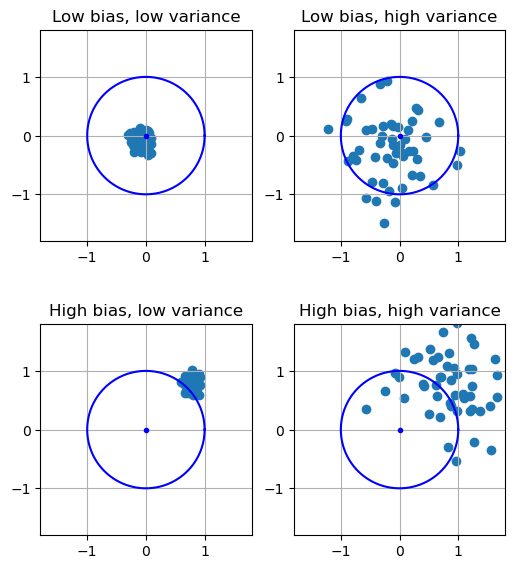

In [18]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
# Define the parameters for the target circle
circle_radius = 1
circle_center = (0, 0)

# Create an array of angles to generate points on the circle
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate the coordinates of points on the circle
x_circle = circle_center[0] + circle_radius * np.cos(angles)
y_circle = circle_center[1] + circle_radius * np.sin(angles)

# Generate random points (darts) with different bias-variance configurations
num_darts = 50
np.random.seed(0)
x_darts = np.random.uniform(-1.5, 1.5, num_darts)
y_darts = np.random.uniform(-1.5, 1.5, num_darts)

# Create different bias-variance configurations
biases = [-0.1, 0.8]
variances = [0.1, 0.5]

# Create subplots for different bias-variance configurations
plt.figure(figsize=(6, 7))

titles = [
    'Low bias, low variance',
    'Low bias, high variance',
    'High bias, low variance',
    'High bias, high variance'
]
h = 0
for i, bias in enumerate(biases):
    for j, variance in enumerate(variances):
        plt.subplot(len(biases), len(variances), i * len(variances) + j + 1)

        # Add the target circle
        plt.plot(x_circle, y_circle, label="Target", color="blue")
        plt.plot(0, 0, '.',label="Target Center", color="blue")

        dart_color = np.random.rand(3,)  # Random color for each dart
        #dart_x = x_darts[k] + bias + np.random.normal(0, variance)
        #dart_y = y_darts[k] + bias + np.random.normal(0, variance)
        x_darts = np.random.normal(bias, variance, num_darts)
        y_darts = np.random.normal(bias, variance, num_darts)
        plt.scatter(x_darts, y_darts)

        plt.xlim(-1.8, 1.8)
        plt.ylim(-1.8, 1.8)
        plt.gca().set_aspect('equal', adjustable='box')
        #plt.legend(loc="upper right")
        plt.title(titles[h])
        h+=1
        #plt.xlabel("X-axis")
        #plt.ylabel("Y-axis")
        plt.grid()

#plt.tight_layout()
plt.show()


The four cases are:
* Low bias, low variance: all estimates will be close to the true value;
* Low bias, high variance: in average, estimates will be close to the true value, but different estimates may greatly differ;
* High bias, low variance: while different estimates will be similar, they all are very far away from the true value;
* High bias, high variance: we don't have many guarantees - estimates will all be different, but also far from the real value, even in average.

It's clear that having low bias and low variance is desirable, but, as we will see, this is not always easy to achieve. In practice, we'll see that in many cases it there is a trade-off between bias and variance, meaning that **we can tweak our estimator to find a balance between these two properties**.

## Hypothesis Testing

Confidence intervals provide a range of plausible values for a population parameter based on a sample. A **hypothesis test**, instead, is used to **challenge a specific claim** about that parameter. Examples of hypotheses we might want to test include:

- The average weight of cookie packages is exactly 1000g.
- Two different ovens produce cookies with the same average weight.
- The proportion of underweight packages is below a regulatory threshold.

If the hypothesis is rejected, we conclude that the claim is likely false. Otherwise, we do not have enough evidence to reject it, and we act as if it were true.

### Hypothesis Testing for Cookie Weights

Let’s return to our bakery. The packaging machine is set to produce cookie packages weighing **exactly 1000g**. We take a sample of $n = 1000$ packages and compute:

$$
\overline{x} = 1000.0005 \text{g}, \quad s_{n-1} = 0.01 \text{g}
$$

We assume the small deviation is due to measurement noise or natural variation, and we are inclined to believe that the **true mean is still $\mu = 1000$g**.

However, our quality control manager raises a concern: what if the population mean is **not** 1000g? She proposes a formal test to challenge the assumption. We define:

- **Null hypothesis** ($H_0$): the population mean is $\mu_0 = 1000$g
- **Alternative hypothesis** ($H_a$): the population mean is different from 1000g

Before proceeding, we ask what margin of error is acceptable. The manager says she can tolerate a **5% chance of wrongly rejecting $H_0$**. This defines our **significance level**:

$$
\alpha = 0.05
$$

We now ask: **how much does our sample mean $\overline{x} = 1000.1$g deviate from the assumed mean $\mu_0 = 1000$g?** More precisely, **what is the probability of observing a difference this large (or larger) just by chance?**

To answer this, we compute the **test statistic** using the t-distribution:

$$
t = \frac{\overline{x} - \mu_0}{s_{n-1}/\sqrt{n}} = \frac{1000.0005 - 1000}{0.01 / \sqrt{1000}} = 1.58
$$

This tells us how many standard errors our estimate is away from the hypothesized mean.

We now ask: **what is the probability of observing a value this extreme or more extreme, assuming $H_0$ is true?** This is the **p-value**, defined as:

$$
P(|z| > |t|)
$$

This is the area under the tails of the t-distribution beyond $t$ and $-t$:

Test statistic (t): 1.5811


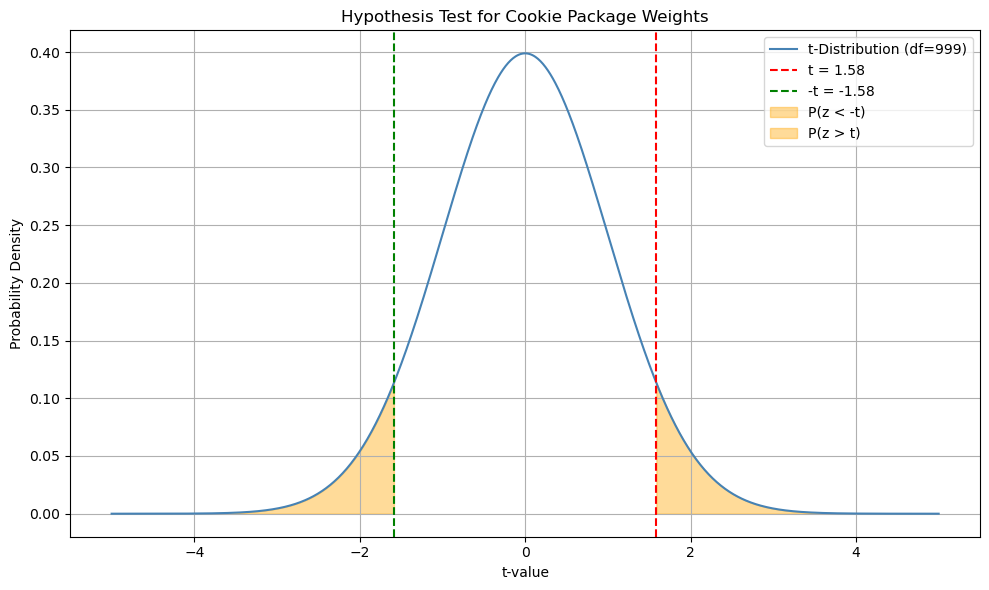

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters from the bakery example
n = 1000
df = n - 1
mu_0 = 1000
x_bar = 1000.0005
s = 0.01

# Compute test statistic
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))
print(f"Test statistic (t): {t_stat:.4f}")

# Generate x values for the t-distribution
x = np.linspace(-5, 5, 1000)
pdf = t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f"t-Distribution (df={df})", color='steelblue')

# Mark the test statistic and its symmetric counterpart
plt.axvline(t_stat, color='red', linestyle='--', label=f"t = {t_stat:.2f}")
plt.axvline(-t_stat, color='green', linestyle='--', label=f"-t = {-t_stat:.2f}")

# Shade the p-value areas
plt.fill_between(x, 0, pdf, where=(x <= -t_stat), color='orange', alpha=0.4, label="P(z < -t)")
plt.fill_between(x, 0, pdf, where=(x >= t_stat), color='orange', alpha=0.4, label="P(z > t)")

# Labels and legend
plt.title("Hypothesis Test for Cookie Package Weights")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Since the t-Student distribution is symmetrical, we can easily compute the p-value as:

$$\text{p-value} = 2(1-CDF_t(t))$$

In our case, we obtain:

In [45]:
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))
print(f"{2*(1-t.cdf(t_stat, df, loc=0, scale=1)):0.2f}")

0.11


This is a large number! How to interpret it?

> If the true mean is $\mu=1000$ and we repeat sampling many times ($n=1000$), then $11\%$ of the times we obtain a deviation more extreme than the observed one.

We now compare this number to the significance level of $5\%$. If we reject the null hypothesis, we risk to make a mistake $11\%$ of times, which is above the threshold of $5\%$. Hence, **we cannot reject the null hypothesis** under these circumstances.

Does this mean that the two means are the same? **We don't know, the test does not tell us what to do in this case!** But we may try to collect more measurements hoping to reduce uncertainty.

We suspect that our sample is too small, so we collect a total of $n=5000$ examples and obtains:

$$\overline x = 1000.0001$$
$$s_{n-1} = 0.0031$$

The mean has decreased a little and the standard deviation has decreased. We recompute the statistic and obtain:

In [48]:
stat = (1000.0001-1000)/(0.0031/np.sqrt(5000))
print(f"{stat:0.2f}")

2.28


We have a larger (more extreme) statistic. We hence compute our p-value:

In [49]:
stat = (1000.0001-1000)/(0.0031/np.sqrt(5000))
p=2*(1-t.cdf(stat, df, loc=0, scale=1))
print(f"{p:0.2f}")

0.02


This p-value is now below the threshold of $5\%$. We can now reject the null hypothesis and conclude that the population mean is different than $1000g$.

#### One-tailed Tests

The tests seen above is a "two-tailed test" in which we summed the areas in the two tails of the distribution. Depending on the form of the alternative hypothesis, in particular:

* If the alternative hypothesis has the form $\mu \neq \mu_0$, then we want to check when the deviation from the assumed mean is larger than the observed one: $P(|x| > |z|)$;
* If the alternative hypothesis has the form $\mu > \mu_0$, then we want to check when the deviation from the assumed mean is positive and larger than the observed one: $P(x > z)$;
* If the alternative hypothesis has the form $\mu < \mu_0$, then we want to check when the deviation from the assumed mean is negative and smaller than the observed one: $P(x < z)$.

This will affect the computation of the p-value as shown in the following figure:

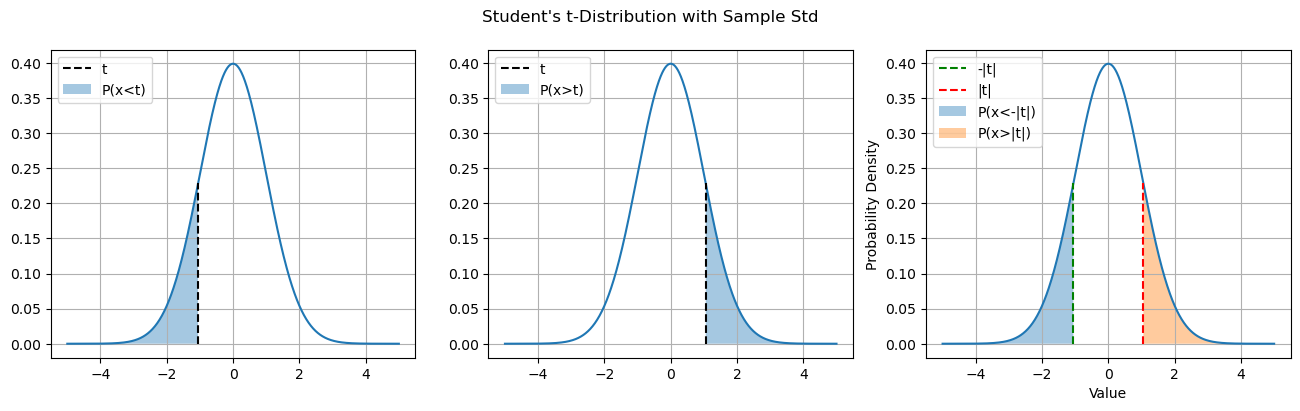

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define the degrees of freedom, mean, and sample standard deviation
df = 999  # Degrees of freedom
mean = 0
sample_std = 1

# Generate x values
x = np.linspace(mean -  5*sample_std, mean + 5*sample_std, 1000)

# Calculate the probability density function (PDF) for the t-distribution
pdf = t.pdf(x, df, loc=0, scale=1)

statistic = (0.1001-0.1)/(0.003/np.sqrt(1000))

# Create the plot
plt.figure(figsize=(16, 4))
plt.subplot(131)
plt.plot(x, pdf)
plt.vlines(-statistic, ymin=0, ymax=t.pdf(-statistic,df), linestyle='--', label='t', color='k')

plt.fill_between(x, 0, pdf, where=(x >= min(x)) & (x <= -statistic), alpha=0.4, label="P(x<t)")
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(132)

plt.plot(x, pdf)
plt.vlines(statistic, ymin=0, ymax=t.pdf(statistic,df), linestyle='--', label='t', color='k')
plt.fill_between(x, 0, pdf, where=(x >= statistic) & (x <= max(x)), alpha=0.4, label="P(x>t)")
plt.grid(True)
plt.legend(loc='upper left')



plt.subplot(133)
plt.plot(x, pdf)

plt.vlines(-statistic, ymin=0, ymax=t.pdf(-statistic,df), linestyle='--', label='-|t|', color='g')
plt.vlines(statistic, ymin=0, ymax=t.pdf(statistic,df), linestyle='--', label='|t|', color='r')

plt.fill_between(x, 0, pdf, where=(x >= min(x)) & (x <= -statistic), alpha=0.4, label="P(x<-|t|)")
plt.fill_between(x, 0, pdf, where=(x >= statistic) & (x <= max(x)), alpha=0.4, label="P(x>|t|)")
plt.legend(loc='upper left')


plt.suptitle("Student's t-Distribution with Sample Std")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


### Hypotheses Tests in General

A hypothesis test generally includes:

 * $H_0$: the **null hypothesis**, e.g., the means of two populations are equal;
 * $H_a$: the **alternative hypothesis**, e.g., the means of two populations are not equal (this determines if the test is one- or two-tailed);
 * a **test statistics** which quantifies how likely it is to reject the null hypothesis. The test statistics follows a specific distribution which depends on the type of statistical tests we are performing. E.g., it can follow a t-Student distribution;
 * a **significance level** $\alpha$ which defines the sensitivity of the test. A common value is $\alpha=0.05$, which means that we can wrongly reject the null hypothesis $5\%$ of the times when it is in fact true. It represents the degree of error that we are willing to accept when performing hypothesis testing. Common values are $0.1$, $0.05$, $0.01$;
 * the **p-value**: this quantifies the probability of sampling a test statistics at least as extreme as the one observed under the null hypothesis. In practice, the p-value measures the probability that the null hypothesis is true but we are observing test statistic leading to rejection nevertheless.
 
The null hypothesis is rejected if the **p-value is larger than the chosen significance level $\alpha$**. We will not see in details all the possible hypothesis tests, but all of them follow a similar scheme.

### Other Important Tests

In this section, we briefly see the main statistical tests which can be used in practice, besides the one for means. We will not see how they are formulated, but we will see how to interpret them. We will see a few other tests when we'll talk about linear regression.

#### One Sample T-Test
This is the test for sample means we have previously seen. It is used to **determine whether the mean of a single sample is significantly different from a known or hypothesized value.**

This test allows to assess whether a sample has a given mean. Let us check if the average height in our dataset is equal to $170cm$:

In [95]:
import numpy as np
from scipy import stats

# Define the null hypothesis mean (population mean you want to test against)
null_hypothesis_mean = 170

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(data['height'], null_hypothesis_mean)

# Set the desired significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print(f"Reject the null hypothesis. The data provides enough evidence to conclude that the population mean is different from {null_hypothesis_mean}.")
else:
    print(f"Fail to reject the null hypothesis. The data does not provide enough evidence to conclude that the population mean is different from {null_hypothesis_mean}.")

print(f"t-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")


Fail to reject the null hypothesis. The data does not provide enough evidence to conclude that the population mean is different from 170.
t-statistic: -0.69
P-value: 0.4872


Let us now check if the average height is $170$ among males only:

In [96]:
import numpy as np
from scipy import stats

# Define the null hypothesis mean (population mean you want to test against)
null_hypothesis_mean = 170

data2 = data[data['sex']=='M']

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(data2['height'], null_hypothesis_mean)

# Set the desired significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print(f"Reject the null hypothesis. The data provides enough evidence to conclude that the population mean is different from {null_hypothesis_mean}.")
else:
    print(f"Fail to reject the null hypothesis. The data does not provide enough evidence to conclude that the population mean is different from {null_hypothesis_mean}.")

print(f"t-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")


Reject the null hypothesis. The data provides enough evidence to conclude that the population mean is different from 170.
t-statistic: 45.52
P-value: 0.0000


#### Two Sample T-Test
A two-sample t-test is used to determine if there is a significant difference between the means of two independent samples. It's often used when you want to compare the means of two different populations or treatments. The test assesses whether the difference between the sample means is statistically significant or if it could have occurred due to random chance. Also in this case, the test statistic will follow a t-Student distribution.

Let us now compare the average heights in two samples we previously obtained via random sampling. We expect no differences:

In [ ]:
import scipy.stats as stats

h1 = sample1['height']
h2 = sample2['height']

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(h1, h2)

# Define significance level (alpha)
alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

# Comment on result
if p_value < alpha:
    print("Conclusion: there is a significant difference between the mean exam scores of the two classes.")
else:
    print("Conclusion: there is no significant difference between the mean exam scores of the two classes.")


Test statistic: 0.52
Significance level: 0.05
P-value: 0.60
Conclusion: there is no significant difference between the mean exam scores of the two classes.


In [54]:
import pandas as pd
hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height']/2.54).astype(int)
hw['weight'] = hw['weight']/2.205
hw

,sex,BMI,height,weight
0,M,33.36,74,53.484771
1,M,26.54,70,38.056472
2,F,32.13,61,34.970812
3,M,26.62,68,35.999365
4,F,27.13,66,34.559390
...,...,...,...,...
4226,F,17.12,69,23.862436
4227,M,27.47,69,38.262182
4228,F,29.16,64,34.970812
4229,F,23.68,64,28.388071


If we compute the average `BMI` for males and females we obtain:

In [55]:
hw.groupby('sex')['BMI'].mean()

sex
F    26.929287
M    27.684959
Name: BMI, dtype: float64

We see a small difference. Is this due to chance or is it significant? If we run a two-sample t-test, we obtain the following results:

In [56]:
import scipy.stats as stats

male_bmi = hw[hw['sex']=='M']['BMI']
female_bmi = hw[hw['sex']=='F']['BMI']

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(male_bmi, female_bmi)

# Define significance level (alpha)
alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

# Comment on result
if p_value < alpha:
    print("Conclusion: there is a significant difference between the two means.")
else:
    print("Conclusion: there is no significant difference between the two means.")


Test statistic: 4.64
Significance level: 0.05
P-value: 0.00
Conclusion: there is a significant difference between the two means.


#### Chi-Square Test for Independence

The Chi-Square Test for Independence is a statistical test used to determine whether there is an association or independence between two or more categorical variables. This test is particularly useful when we want to assess whether changes in one categorical variable are related to changes in another categorical variable. The typical scenario is to set up a contingency table to compare the observed frequencies (counts) of the joint categories of the two variables to the expected frequencies that would occur under the assumption of independence.

The null hypothesis for the Chi-Square Test for Independence is that **there is no association between the two categorical variables** (they are independent), while the alternative hypothesis suggests that there is an association (they are dependent).

The test statistics follows a Chi-square distribution (we won't see the details) in this case.

Let's consider the Titanic dataset:

In [57]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Let's consider the following contingency table:

In [58]:
contingency_table = pd.crosstab(titanic['Pclass'], titanic['Survived'])
contingency_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


We can visualize the distributions of Survived in the three classes for more clarity:

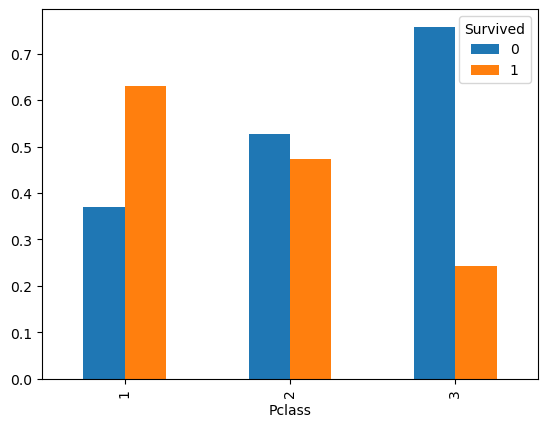

In [59]:
from matplotlib import pyplot as plt
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize=0).plot.bar()
plt.show()

We expect some form of correlation between the two variables. Indeed, the chi-square statistics and Cramer V statistics are:

In [60]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

print(f"Chi-square statistic: {chi2_contingency(contingency_table).statistic:0.2f}")
print(f"Cramer V statistic: {association(contingency_table):0.2f}")

Chi-square statistic: 102.89
Cramer V statistic: 0.34


We have numbers different from zero, but **is this due to chance or is it statistically significant**? If we run a chi-square contingency test:

In [61]:
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Perform the Chi-Square Test for Independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpret the results
if p < alpha:
    print("\nThere is a significant association between 'Pclass' and 'survived'.")
else:
    print("\nThere is no significant association between 'Pclass' and 'survived'.")


Chi-Square Statistic: 102.88898875696056
p-value: 4.549251711298793e-23

There is a significant association between 'Pclass' and 'survived'.


#### Chi-Square Goodness-of-Fit Test

The Chi-Square Goodness of Fit test is a statistical test used to determine whether observed categorical data (frequencies) fit a specified distribution or expected frequencies. This test is often used to assess whether the observed data deviates significantly from a hypothesized distribution. The typical scenario is to compare observed frequencies with expected frequencies based on a theoretical model or prior knowledge.

The null hypothesis for the Chi-Square Goodness of Fit test is that **there is no significant difference between the observed and expected frequencies**, meaning the observed data fits the specified distribution. The alternative hypothesis suggests that there is a significant difference.

The test statistics follows a Chi-square distribution in this case.

Let us consider the Titanic dataset again. We know that the distribution of `Sex` among passengers is biased:

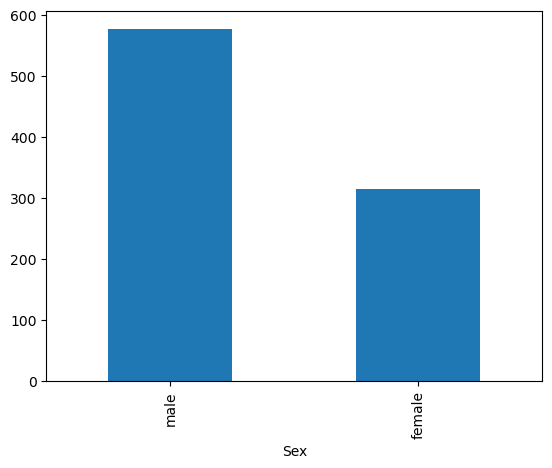

In [62]:
titanic['Sex'].value_counts().plot.bar()
plt.show()

We now consider the distribution of `Sex` among passengers less than $18$ years old:

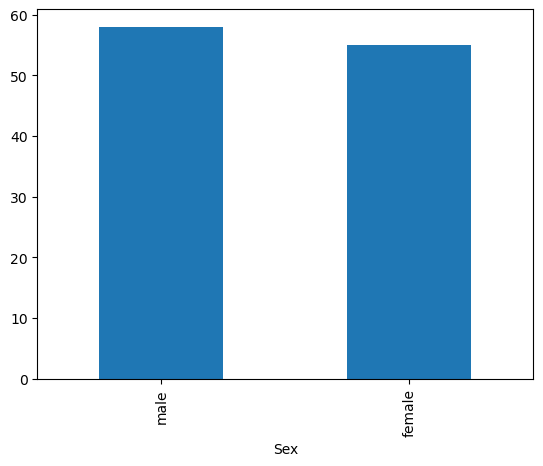

Sex
male      58
female    55
Name: count, dtype: int64

In [63]:
minor=titanic[titanic['Age']<18]
observed_frequencies = minor['Sex'].value_counts()
observed_frequencies.plot.bar()
plt.show()
observed_frequencies

This looks less biased, but there are still minor differences between the counts. Are these due to chance? If `Sex` was distributed uniformly (as we hypothesize), we would have the following frequencies:

In [64]:
expected_frequencies = [113/2, 113/2]
expected_frequencies

[56.5, 56.5]

We can run a Goodness-of-fit test to check if the observed frequencies match the expected ones:

In [65]:
import seaborn as sns
import pandas as pd
from scipy.stats import chisquare

# Load the Titanic dataset
titanic_data = sns.load_dataset("titanic")

observed_frequencies = minor['Sex'].value_counts().values

# Define expected frequencies that closely match the observed data
expected_frequencies = [113/2, 113/2]

chi2, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Observed Frequencies:")
print(observed_frequencies)
print("\nExpected Frequencies:")
print(expected_frequencies)
print("\nChi-Square Statistic:", chi2)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("\nThe observed data significantly deviates from the expected distribution.")
else:
    print("\nThe observed data fits the expected distribution.")


Observed Frequencies:
[58 55]

Expected Frequencies:
[56.5, 56.5]

Chi-Square Statistic: 0.07964601769911504
p-value: 0.7777776907897473

The observed data fits the expected distribution.


Given the large p-value, we could not reject the null hypothesis that there are significant differences between expected and observed frequencies.

#### Pearson/Spearman Correlation Test

We have seen how to compute Pearson/Spearman correlation coefficient. However, what can we say when we get small values? Are those supposed to be zero, but we got something different from zero due to sampling, or are they significantly different from zero?

The statistical tests associated with the correlation coefficients are used to determine whether the observed correlation between two variables is statistically significant or if it might have occurred due to random chance. This test assesses whether the correlation in the sample data is likely to reflect a true correlation in the population.

The null hypothesis is that **there is no statistically significant correlation between the two variables in the population**. In other words, the true correlation coefficient in the population is zero.

Let us consider the Titanic dataset. We find the following correlation between the `Age` and `Fare` variables:

Correlation between age and fare: 0.10


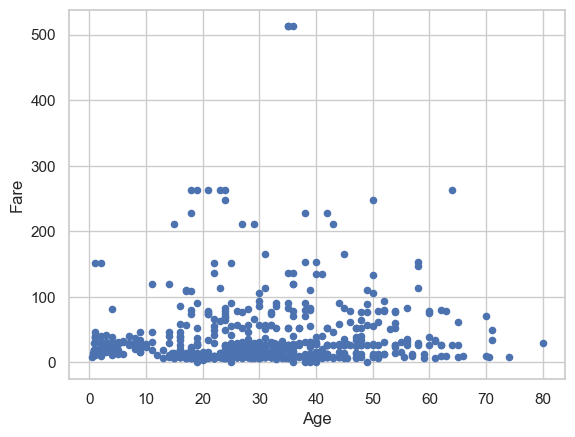

In [100]:
titanic.plot.scatter(x='Age',y='Fare')
tt=titanic.dropna()
print(f"Correlation between age and fare: {titanic[['Age','Fare']].dropna().corr().values[0][1]:.2f}")

Is this small positive correlation "true" or due to chance? Let us run a statistical test:

In [101]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats

tt = titanic[['Age','Fare']].dropna()

# Extract the 'age' and 'fare' columns
age = tt['Age']
fare = tt['Fare']

# Perform a Pearson correlation test
r, p_value = stats.pearsonr(age, fare)

# Define the significance level
alpha = 0.05

# Display the results
print(f"Pearson correlation coefficient (r): {r}")
print(f"P-value: {p_value}")

# Compare the p-value to alpha
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant correlation between age and fare.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between age and fare.")


Pearson correlation coefficient (r): 0.0960666917690389
P-value: 0.010216277504447016
Reject the null hypothesis. There is a significant correlation between age and fare.


The p-value is small enough to reject the null hypothesis: the correlation is small but statistically significant.

Similar tests exist for Spearman coefficient:

In [102]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats

tt = titanic[['Age','Fare']].dropna()

# Extract the 'age' and 'fare' columns
age = tt['Age']
fare = tt['Fare']

# Perform a Pearson correlation test
r, p_value = stats.spearmanr(age, fare)

# Define the significance level
alpha = 0.05

# Display the results
print(f"Spearman correlation coefficient (r): {r}")
print(f"P-value: {p_value}")

# Compare the p-value to alpha
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant correlation between age and fare.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between age and fare.")


Spearman correlation coefficient (r): 0.1350512177342878
P-value: 0.0002958090324306092
Reject the null hypothesis. There is a significant correlation between age and fare.


## Assessing whether a Sample is Normally Distributed
While the Normal distribution is pervasive, in some cases, it is useful to assess whether a given sample follows a normal distribution before assuming this is true. Let us consider the dataset of heights and weights and plot the distribution of weights:

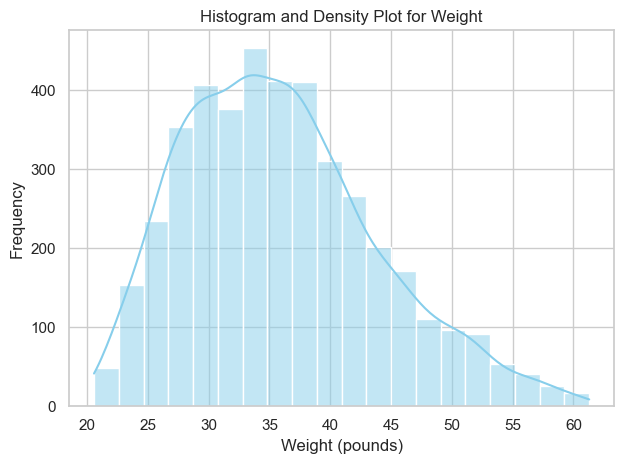

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
hw = pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height'] / 2.54).astype(int)  # Convert height to inches
hw['weight'] = hw['weight'] / 2.205               # Convert weight to pounds

# Set up the plotting style
sns.set(style="whitegrid")

# Plotting for weight
sns.histplot(hw['weight'], kde=True, color="skyblue", bins=20)
plt.title('Histogram and Density Plot for Weight')
plt.xlabel('Weight (pounds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Does the distribution look Gaussian? Let us compute Skewness and Kurtosis:

In [114]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load and preprocess the data
hw = pd.read_csv('http://antoninofurnari.it/downloads/height_weight_pounds.csv')

# Calculate skewness and kurtosis for weight
weight_skewness = skew(hw['weight'])
weight_kurtosis = kurtosis(hw['weight'])  

print(f"Skewness of weight: {weight_skewness:.2f}")
print(f"Kurtosis of weight: {weight_kurtosis:.2f}")

Skewness of weight: 0.57
Kurtosis of weight: -0.06


We not that:
* We have a positive Skewness: this indicates that the distribution is skewed towards the right side (the right tail is longer) as compared to a Normal distribution;
* We have a Kurtosis slightly lower than zero: the distribution is slightly "flatter" than a Normal distribution.

While Skewness and Kurtosis can help characterize deviations from normality, there are tests which can be used.

### Quantile-Quantile Plots (Q-Q Plots)

Quantile-Quantile plots, or Q-Q plots, are a powerful tool to **assess how well a sample matches a theoretical distribution**. The idea is simple: we compare the **quantiles of the empirical data** with the **quantiles of a reference distribution**—typically the normal distribution.

To make the comparison meaningful and remove scale effects, the empirical data is often **standardized into z-scores**. If the sample truly follows the theoretical distribution, the quantiles will align, and the points will fall along the diagonal line $y = x$.

Deviations from this line reveal **systematic differences** between the empirical and theoretical distributions. For example:
- A curve that bends away from the diagonal suggests skewness.
- S-shaped patterns may indicate heavier or lighter tails than expected.

In the following graph, we show the Q-Q plot for the sample of cookie package weights. It helps us visually evaluate whether the sample distribution is approximately normal—a key assumption in many statistical methods.

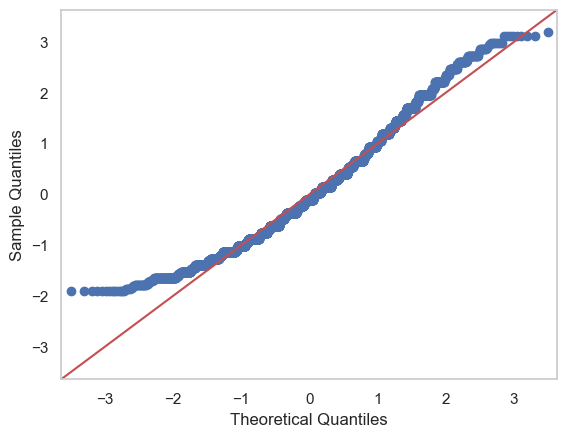

In [115]:
from statsmodels.graphics.gofplots import qqplot
import pandas as pd
from matplotlib import pyplot as plt

# fit=True means the distribution should be fitted to the data
# and the data should be standardized
# line='45' means a 45-degree reference line will be plotted
qqplot(hw['weight'], fit=True, line='45')
plt.grid()
plt.show()

The plot relates the "theoretical" quantiles with those of the sample. The fact that the points on the plot do not lie on the diagonal indicates that there is a discrepancy between the empirical data distribution and the Gaussian distribution.

Analyzing a Q-Q Plot can be complex. In practice, **there are some guidelines to understand how a sample deviates from a theoretical distribution**. The following figure compares the q-q plots of different distributions:

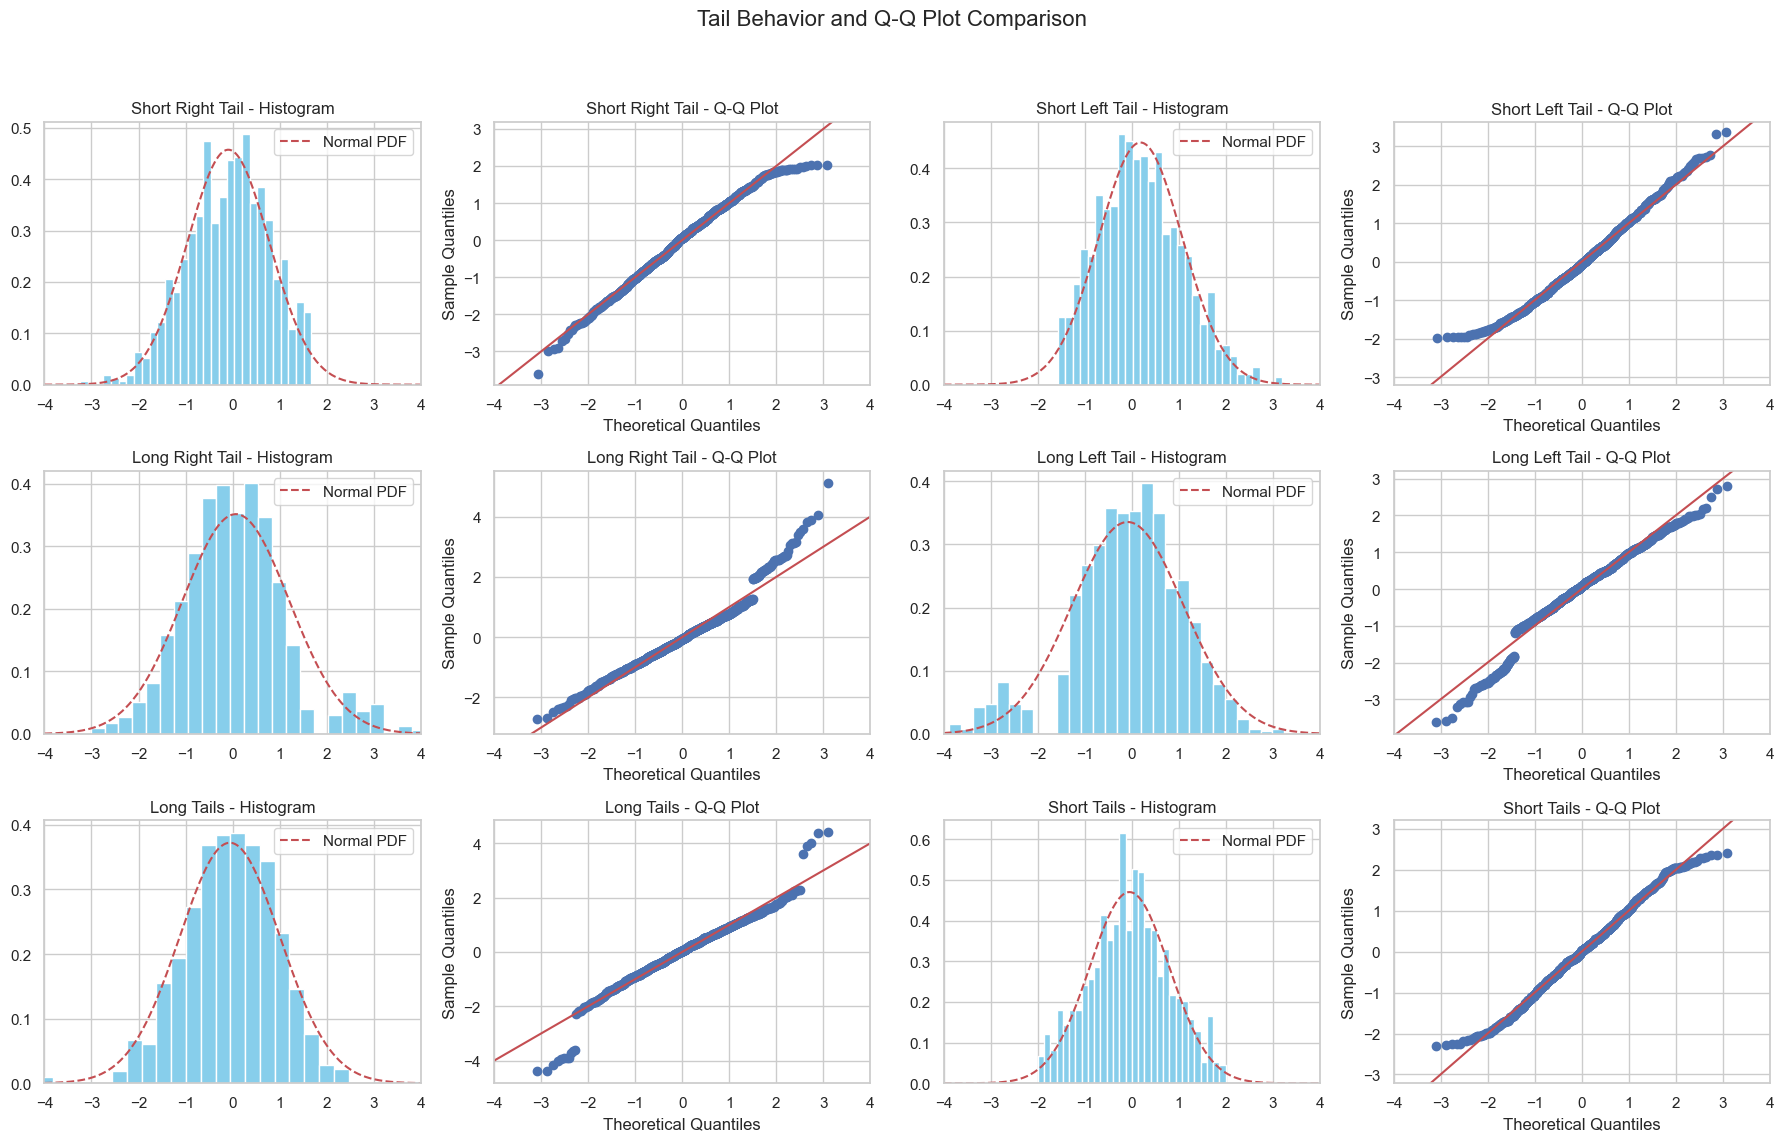

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic distributions
n = 1000
asimmetrica_destra = np.sort(np.random.normal(0, 1, n))[:950]  # short right tail
asimmetrica_sinistra = np.sort(np.random.normal(0, 1, n))[50:]  # short left tail

code_dx_lunga = np.random.normal(0, 1, n)
code_dx_lunga[code_dx_lunga > 1.5] *= 1.5  # long right tail

code_sx_lunga = np.random.normal(0, 1, n)
code_sx_lunga[code_sx_lunga < -1.5] *= 1.5  # long left tail

code_lunghe = np.random.normal(0, 1, n)
code_lunghe[np.abs(code_lunghe) > 2.5] *= 1.5  # long tails both sides

code_corte = np.random.normal(0, 1, n)
code_corte[np.abs(code_corte) > 2] *= 0.1  # short tails both sides

# Organize data and labels
distributions = [
    ("Short Right Tail", asimmetrica_destra),
    ("Short Left Tail", asimmetrica_sinistra),
    ("Long Right Tail", code_dx_lunga),
    ("Long Left Tail", code_sx_lunga),
    ("Long Tails", code_lunghe),
    ("Short Tails", code_corte),
]

# Create figure
fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot each distribution
for i, (label, data) in enumerate(distributions):
    row = i // 2
    col = (i % 2) * 2

    # Histogram with normal curve
    ax_hist = plt.subplot(3, 4, i * 2 + 1)
    ax_hist.hist(data, bins=30, density=True, color='skyblue', edgecolor='white')
    x = np.linspace(-4, 4, 200)
    g = norm(loc=np.mean(data), scale=np.std(data))
    ax_hist.plot(x, g.pdf(x), 'r--', label='Normal PDF')
    ax_hist.set_title(f"{label} - Histogram")
    ax_hist.set_xlim([-4, 4])
    ax_hist.legend()

    # Q-Q plot
    ax_qq = plt.subplot(3, 4, i * 2 + 2)
    qqplot(data, fit=True, line='45', ax=ax_qq)
    ax_qq.set_title(f"{label} - Q-Q Plot")
    ax_qq.set_xlim([-4, 4])

plt.suptitle("Tail Behavior and Q-Q Plot Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Every time we observe a Q-Q Plot, we can relate these features to characteristics of the distribution. Clearly, these characteristics can also combine to create more complex Q-Q Plots, as seen in the case of weights. 

### Shapiro-Wilk Normality Test
The Shapiro-Wilk test is a statistical test used to assess whether a sample follows a Gaussian (normal) distribution. It is used with small samples ($n\leq 2000$) It works by comparing the observed data to what you would expect if the data were drawn from a truly Gaussian distribution. 

The null hypothesis for this test is that the population is normally distributed.

We will not see the formal details of this test, but we can use it in our analyses. Here is the result on the `weight` sample in our height-weight dataset:

In [117]:
from scipy.stats import shapiro
import pandas as pd

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(hw['weight'])

# Set the significance level (alpha)
alpha = 0.05

print(f"Test statistic: {statistic:0.2f}")
print(f"P-value: {p_value:0.2f}")

# Check the p-value against the significance level
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


Test statistic: 0.97
P-value: 0.00
Sample does not look Gaussian (reject H0)


### D'Agostino's K-squared test

When samples are large ($n \geq 50$), the D'Agostino's K-squared test is more used. It is based on Skewness and Kurtosis. 

The null hypothesis for this test is that the population is normally distributed.

Here is the result for our example:

In [118]:
import pandas as pd
from scipy.stats import normaltest

# Perform D'Agostino's K-squared test
statistic, p_value = normaltest(hw['weight'])

# Set the significance level (alpha)
alpha = 0.05

print(f"Test statistic: {statistic:.2f}")
print(f"P-value: {p_value:.2f}")

# Check the p-value against the significance level
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


Test statistic: 201.64
P-value: 0.00
Sample does not look Gaussian (reject H0)


## Exercises
> Exercise 1
> 
> Consider the sample of all passengers in the titanic dataset. Compute the mean age of all passengers. Then, compute the confidence bounds for this mean setting the confidence level to 0.95. Is the estimated mean a reliable estimate of the population mean?

> Exercise 2
> 
> Consider the samples of all passengers in the titanic dataset. Compute the variance of the ages of all passengers. Then, compute the confidence bounds for this variance setting the confidence level to 0.95. Is the estimated variance a reliable estimate of the population variance?

> Exercise 3
> 
> Extract the sample of values of Sex of passengers in second class in the titanic dataset. Compute the contingency table of absolute counts of the Sex column. Compute the confidence bounds for the proportions of Sex in the sample. Are the estimated bounds reliable? Repeat the analysis for class 1 and 3.

> Exercise 4
> 
> The average age of women in the US population is 40. Run a statistical test to assess whether the sample of ages in the `infert` dataset has the same mean as the US population. What is the result of the test? Are women in `infert` younger or older than the average?
>
> You can load the dataset installing the `pydataset` library with `pip install pydataset` and then:
>
> `from pydataset import data; infert = data("infert")`

> Exercise 5
> 
> Consider the `titanic` dataset. Follow these steps to assess that males and females **are not equally distributed**:
>
> * Obtain a table of absolute frequencies of the values of `Sex`;
> * Show a barplot comparing the proportions of male and female passengers. Do these look equally distributed?
> * Run a statistical test to assess whether the proportion of males and females are equal ($p=0.5$). What is the result of the test?
> * Run the statistical test setting $p=1/3$. Is the result different? Can we reject the null hypothesis? Why?


## References

* Chapters 6-8 of \[1\];
* Parts of chapter 9 of \[2\].

\[1\] Gonick, L., & Smith, W. (1993). The cartoon guide to statistics. HarperCollins Publishers, Inc.

\[2\] Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.